In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import math
import yfinance as yf
from datetime import datetime, timedelta
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler


In [2]:
data=yf.download(tickers='EURUSD=X',start='2011-12-31',end='2019-12-31',interval ='1d')
data_close = data.filter(['Close'])
dataset = data_close.values
train_len = math.ceil( len(dataset) *.8) 
scaler = MinMaxScaler(feature_range = (0, 1))
training_data = scaler.fit_transform(dataset[:train_len , : ]) 
x_train =[] 
y_train =[] 

for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)
x_train= np.reshape(x_train,( x_train.shape[0] ,x_train.shape[1] ,1))

[*********************100%***********************]  1 of 1 completed


In [3]:
test_data = scaler.transform(dataset[train_len - 60: , : ])
x_test = []
y_test = []

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [4]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM( 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.save('lstm_model.h5')

In [5]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs = 100, batch_size = 32)

Epoch 1/100
51/51 [==============================] - 5s 54ms/step - loss: 0.0624 - val_loss: 5.3871e-04
Epoch 2/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0056 - val_loss: 4.5451e-04
Epoch 3/100
51/51 [==============================] - 2s 36ms/step - loss: 0.0048 - val_loss: 5.0524e-04
Epoch 4/100
51/51 [==============================] - 2s 35ms/step - loss: 0.0042 - val_loss: 4.0365e-04
Epoch 5/100
51/51 [==============================] - 2s 35ms/step - loss: 0.0035 - val_loss: 4.0909e-04
Epoch 6/100
51/51 [==============================] - 2s 34ms/step - loss: 0.0032 - val_loss: 4.2627e-04
Epoch 7/100
51/51 [==============================] - 2s 34ms/step - loss: 0.0028 - val_loss: 4.3403e-04
Epoch 8/100
51/51 [==============================] - 2s 34ms/step - loss: 0.0028 - val_loss: 7.5312e-04
Epoch 9/100
51/51 [==============================] - 2s 34ms/step - loss: 0.0029 - val_loss: 3.7746e-04
Epoch 10/100
51/51 [==============================] - 2s 33ms/st

In [35]:
end_date = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=84)).strftime('%Y-%m-%d')
user_df = yf.download(tickers='EURUSD=X', start=start_date, end=end_date, interval='1d')
user_df = user_df.filter(['Close'])
user_data_value = user_df.values
user_data = scaler.transform(user_data_value)
forex_input = []
for i in range(60, len(user_data)):
    forex_input.append(user_data[i - 60:i, 0])
temp_input = list(forex_input)
temp_input = temp_input[0].tolist()
forex_input = np.array(forex_input)
forex_input = np.reshape(forex_input, (forex_input.shape[0], forex_input.shape[1], 1))



lstm_output = []
n_steps = 60
i = 0

while i < 10:

        if (len(temp_input) > n_steps):
            forex_input = np.array(temp_input[1:])
            forex_input = forex_input.reshape(1, -1)
            forex_input = forex_input.reshape((1, n_steps, 1))
            yhat = model.predict(forex_input)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lstm_output.extend(yhat.tolist())
            i = i + 1
        else:
            forex_input = forex_input.reshape((1, n_steps, 1))
            yhat = model.predict(forex_input)
            temp_input.extend(yhat[0].tolist())
            lstm_output.extend(yhat.tolist())
            i = i + 1

predictions = scaler.inverse_transform(lstm_output)


print(predictions)

[*********************100%***********************]  1 of 1 completed
[[1.23235944]
 [1.23304278]
 [1.23312253]
 [1.23308227]
 [1.23304306]
 [1.23304683]
 [1.23310571]
 [1.23321684]
 [1.2333704 ]
 [1.23355454]]


In [26]:
temp_input

[0.4133672334189926,
 0.40236990825292684,
 0.4118197086505151,
 0.4007934263195039,
 0.3936393230218891,
 0.38362856173128845,
 0.3638632763887317,
 0.3535326394388507,
 0.3537242281231987,
 0.3874536011938434,
 0.3791119174222466,
 0.4030796955053093,
 0.42439721957342735,
 0.40584308449027295,
 0.4034345891315003,
 0.3925611736945034,
 0.3990846168765052,
 0.4109082313771757,
 0.41491576832113086,
 0.4161080627521967,
 0.4115819905289868,
 0.41690303794331385,
 0.41690303794331385,
 0.4101950770125904,
 0.426516143282746,
 0.43202137173457444,
 0.4308900220343821,
 0.44655584826984285,
 0.437150157042113,
 0.4756254747628206,
 0.4869871214692463,
 0.49575642849061774,
 0.48889526395465976,
 0.48657262995706274,
 0.4859513977556178,
 0.47686120494130435,
 0.49537325112192176,
 0.4922973941245239,
 0.49667329314348185,
 0.498199941816301,
 0.5109905909416601,
 0.5288221437460603,
 0.5156631325456984,
 0.5215320091154463,
 0.5073372742014555,
 0.5086800785479935,
 0.5067918020245772,
 

In [53]:
forex_input= np.reshape(forex_input,(forex_input.shape[0]))
forex_input.shape

(60,)

[1.23312253]


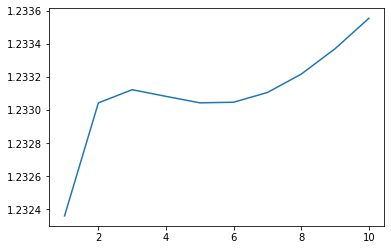

In [65]:

days=np.arange(1,11)

plt.plot(days,predictions)
print(predictions[2])